In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from random import randint

# K Means Classification

Load in the data

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [13]:
X = iris.data[:,:2]
y = iris.target
T = []
u = []
for i in range(len(X)):
    if y[i] == 0 or y[i] == 1:
        T.append(X[i])
        u.append(y[i])

Plot the data

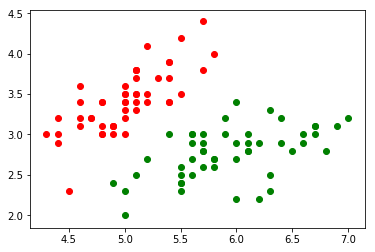

In [6]:
class1 = X[y==0]
class2 = X[y==1]
class3 = X[y==2]
plt.scatter(class1[:,0],class1[:,1], color = 'red')
plt.scatter(class2[:,0],class2[:,1], color = 'green')
plt.show()

Define the K Means class

In [7]:
class KMeans:
    def __init__(self,num_classes,num_epochs):
        self.num_classes = num_classes
        self.num_epochs = num_epochs
        
    def metric(self,point1,point2):
        """Euclidean metric"""
        if len(point1) != len(point2):
            print("Error, points are of different lengths")
            quit()
        else:
            return np.power(np.sum(np.power(point1-point2,2)),0.5)
        
    def cluster(self,xdata,cluster_points):
        """Clusters data points to nearest cluster points"""
        clusters = np.zeros(len(xdata))
        for k in range(len(xdata)):
            distance = np.zeros(len(cluster_points))
            for i in range(len(cluster_points)):
                distance[i] = self.metric(xdata[k],cluster_points[i])
            
            clusters[k] = np.where(distance == np.min(distance))[0][0]
        
        return clusters 
    
    def fit(self,xdata):
        """Fits the data by assiging a classification to each point over the number of specified epochs"""
        cluster_points = np.zeros((self.num_classes,len(xdata[0])))
        #randomly classify each data point based on user specified num_classes
        classification = np.zeros(len(xdata))
        for i in range(len(classification)):
            classification[i] = randint(0,self.num_classes-1)
        #print (classification)
        #loop over all epochs
        for k in range(self.num_epochs):
            #loop over all clustering points to update them
            for i in range(len(cluster_points)):
                cluster_points[i] = np.zeros(len(xdata[0])) 
                count = 0 
                #loop over all classifications
                for j in range(len(classification)):
                    if i == classification[j]:
                        cluster_points[i] += xdata[j]
                        count += 1
                if count != 0:
                    cluster_points[i] = cluster_points[i] / count
                else:
                    cluster_points[i] = np.random.random(len(xdata[0]))
            classification = self.cluster(xdata,cluster_points)
        
        return classification

## Test the model

### Non-overlapping data

In [8]:
KM = KMeans(2,100)

In [9]:
classification = KM.fit(T)
print (classification)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0.]


This method struggles with elliptically shaped datasets

### Overlapping data

In [14]:
KM2 = KMeans(3,100)

In [15]:
classification = KM2.fit(X)
print (classification)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 0. 2. 0. 2. 0. 2. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 2. 0. 2. 0. 2. 2. 1. 2. 2. 2. 2. 2. 2. 0. 0. 2. 2. 2. 2. 0.
 2. 0. 2. 0. 2. 2. 0. 0. 2. 2. 2. 2. 2. 0. 0. 2. 2. 2. 0. 2. 2. 2. 0. 2.
 2. 2. 0. 2. 2. 0.]


The overlapping patters in the data make it hard for the algorithm to cluster effectively between the type '0' and '1' data points